In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

sns.set_theme()

In [2]:
# read data
bts1 = pd.read_csv('../data/raw/bts/dark_wild_final.csv')
taylor1 = pd.read_csv('../data/raw/taylor/nine_final.csv')
justin1 = pd.read_csv('../data/raw/justin/believe_final.csv')

bts2 = pd.read_csv('../data/raw/bts/love_final.csv')
taylor2 = pd.read_csv('../data/raw/taylor/reputation_final.csv')
justin2 = pd.read_csv('../data/raw/justin/purpose_final.csv')

bts3 = pd.read_csv('../data/raw/bts/be_final.csv')
taylor3 = pd.read_csv('../data/raw/taylor/folklore_final.csv')
justin3 = pd.read_csv('../data/raw/justin/changes_final.csv')

In [3]:
all_albums = pd.read_csv('../data/raw/all_albums.csv')
all_albums['num_hashtags'] = all_albums.hashtags.apply(lambda x: len(eval(x)))

In [29]:
artists = ['bts_bighit', 'bts_jp_official', 'bts_twt', 'taylorswift13', 'bighitent', 'justinbieber', 'billboard']

## Random

## Datasets EDA

In [5]:
dfs = [bts1, bts2, bts3, justin1, justin2, justin3, taylor1, taylor2, taylor3]
artists = ['BTS'] * 3 + ['Justin Bieber'] * 3 + ['Taylor Swift'] * 3
album_name = ['Dark & Wild', 'Love Yourself: Tear', 'Be', 'Believe', 'Purpose', 'Changes', '1989', 'Reputation',' Folklore']
num_tweets = [len(df) + df.retweets_count.sum() for df in dfs]
num_replies = [df.replies_count.sum() for df in dfs]
num_users = [df.username.nunique() for df in dfs]
num_followers = ['255K', '11M', '25M', '24M', '69M', '110M', '46M', '85M', '86M']
release_date = [df[df.normalized_dates == 0].iloc[0].date for df in dfs]

In [9]:
index = pd.MultiIndex.from_tuples(list(zip(artists, album_name)), names=['Artist', 'Album Name'])
combined = pd.DataFrame({'Release Date': release_date,
                         'Number of Followers at Release': num_followers,
                         'Number of Tweets (Tweets + Retweets)': num_tweets,
                         'Number of Replies': num_replies,
                         'Number of Unique Users': num_users}, index=index)

In [10]:
combined

Release Date Number of Followers at Release  \
Artist        Album Name                                                        
BTS           Dark & Wild           2014-08-19                           255K   
              Love Yourself: Tear   2018-05-18                            11M   
              Be                    2020-11-20                            25M   
Justin Bieber Believe               2012-06-15                            24M   
              Purpose               2015-11-13                            69M   
              Changes               2020-02-14                           110M   
Taylor Swift  1989                  2014-10-27                            46M   
              Reputation            2017-11-10                            85M   
               Folklore             2020-07-24                            86M   

                                   Number of Tweets (Tweets + Retweets)  \
Artist        Album Name                                                  
BTS           Dark & Wild                                        259549   
              Love Yourself: Tear                              12459419   
              Be                                               25321067   
Justin Bieber Believe                                             96715   
              Purpose                                            227519   
              Changes                                            329384   
Taylor Swift  1989                                               301934   
              Reputation                                         484394   
               Folklore                                         1459533   

                                   Number of Replies  Number of Unique Users  
Artist        Album Name                                                      
BTS           Dark & Wild                      11929                   16506  
              Love Yourself: Tear             338322                   79306  
              Be                             2163958                  318763  
Justin Bieber Believe                           7978                   22249  
              Purpose                           9550                   24566  
              Changes                          62110                   25053  
Taylor Swift  1989                             22550                   61522  
              Reputation                       70672                   34886  
               Folklore                       291518                   62363

In [27]:
def bin_users(x):
    if x <=1:
        return '<=1'
    if x< 10:
        return '2-10'
    if x < 100:
        return '10-100'
    if x < 500:
        return '100-500'
    else:
        return '>500'

In [28]:
bts3_no_artist = bts3[~bts3.username.isin(artists)]

In [29]:
bts3_likes_counts = bts3_no_artist.groupby('username').likes_count.sum().to_frame()
bts3_likes_counts['bins'] = bts3_likes_counts.likes_count.apply(bin_users)
bts3_likes_counts = bts3_likes_counts.groupby('bins').likes_count.count().to_frame().reset_index()

In [30]:
bts3_retweets_counts = bts3_no_artist.groupby('username').retweets_count.sum().to_frame()
bts3_retweets_counts['bins'] = bts3_retweets_counts.retweets_count.apply(bin_users)
bts3_retweets_counts = bts3_retweets_counts.groupby('bins').retweets_count.count().to_frame().reset_index()

In [31]:
bts3_replies_counts = bts3_no_artist.groupby('username').replies_count.sum().to_frame()
bts3_replies_counts['bins'] = bts3_replies_counts.replies_count.apply(bin_users)
bts3_replies_counts = bts3_replies_counts.groupby('bins').replies_count.count().to_frame().reset_index()

In [32]:
to_bar = pd.DataFrame().assign(bins=['<=1', '2-10', '10-100', '100-500', '>500'])
to_bar = to_bar.merge(bts3_likes_counts).merge(bts3_retweets_counts).merge(bts3_replies_counts).sort_values('likes_count', ascending=False)

In [33]:
to_bar

,bins,likes_count,retweets_count,replies_count
0,<=1,219253,266623,290469
1,2-10,67420,35665,20866
2,10-100,24884,12859,6225
3,100-500,4628,2238,960
4,>500,2574,1374,239


(0, 300000)

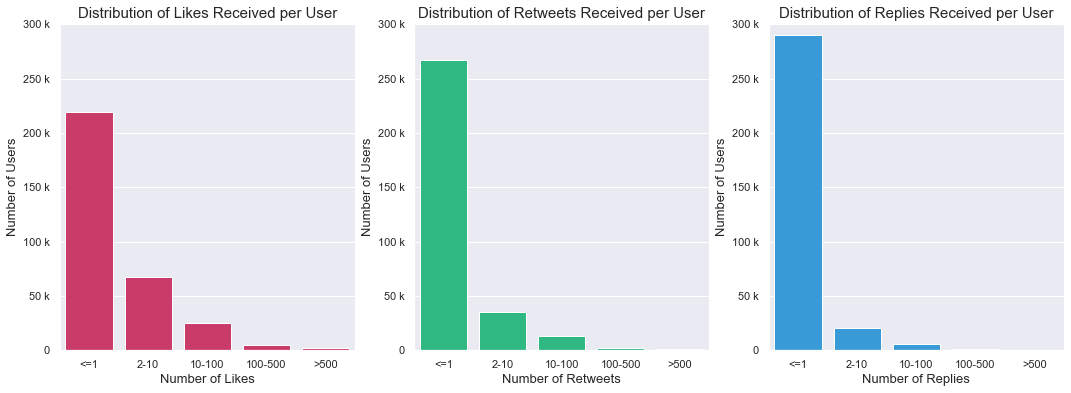

In [34]:
fig_dims = (18, 6)
fig, ax = plt.subplots(1, 3, figsize=fig_dims)
sns.barplot(x='bins', y='likes_count', data=to_bar, ax=ax[0], color='#e02460')
ax[0].set_title('Distribution of Likes Received per User', fontsize=15)
ax[0].set_xlabel('Number of Likes', fontsize=13)
ax[0].set_ylabel('Number of Users', fontsize=13)
ax[0].yaxis.set_major_formatter(ticker.EngFormatter())
ax[0].set_ylim(0, 300000)

sns.barplot(x='bins', y='retweets_count', data=to_bar, ax=ax[1], color='#19cf86')
ax[1].set_title('Distribution of Retweets Received per User', fontsize=15)
ax[1].set_xlabel('Number of Retweets', fontsize=13)
ax[1].set_ylabel('Number of Users', fontsize=13)
ax[1].yaxis.set_major_formatter(ticker.EngFormatter())
ax[1].set_ylim(0, 300000)

sns.barplot(x='bins', y='replies_count', data=to_bar, ax=ax[2], color='#1DA1F2')
ax[2].set_title('Distribution of Replies Received per User', fontsize=15)
ax[2].set_xlabel('Number of Replies', fontsize=13)
ax[2].set_ylabel('Number of Users', fontsize=13)
ax[2].yaxis.set_major_formatter(ticker.EngFormatter())
ax[2].set_ylim(0, 300000)

## Sample EDA
Albums chosen (from 2 days before release to 12 days after):<br>
BTSDw - (August 17 2014 - Aug 31 2014)<br>
BTSLove - (May 16 2018 - May 30 2018)<br>
BTSBe - (November 18 2020 - December 2 2020)<br>

TS1989 - (October 25 2014 - Nov 8 2014)<br>
TSRep - (Nov 8 2017 - Nov 22 2017)<br>
TSFolk - (July 22 2020 - Aug 5 2020)<br>

JBB - (June 13 2012 - June 27 2012)<br>
JBP - (Nov 11 2015 - Nov 25 2015)<br>
JBC - (Feb 12 2020 - Feb 26 2020)<br>

We are treating a combination of all our datasets (40,000 tweets from each album, otherwise BTSBe makes up >50% of all the tweets) as a "sample" of the twitter population, specifically a sample of the Fandom population on twitter. EDA section will introduce stats of that sample as "baseline" measures, while Results section will compare stats between artists.

### Basic Stats

Notes: normalized stats for normalized sample (treat sample as rate, ie per 360k, have units. can divide by 36 and say per 10k tweets), basic stats such as len(tweets) or unique on the entire dataset

tables/plots in appendix

In [5]:
print('Number of Tweets (of sample):', len(all_albums))

Number of Tweets (of sample): 100000


In [6]:
print('Number of unique users per 100k tweets:', all_albums.username.nunique())

Number of unique users per 100k tweets: 67439


In [7]:
print('Average number of tweets per user per 100k tweets', round(len(all_albums) / all_albums.username.nunique(), 2))

Average number of tweets per user per 100k tweets 1.48


### Retweets/Likes
Hypothesis (hopefully conclusion): bts has more content generators and/or they are better at getting engagement

Maybe change or add per tweet per user, or just average likes/retweets per tweet. Narrative: retweets/likes show how much (meaningful) engagement a tweet got

2 types of people: content generators (people who get retweeted a lot), amplifiers (people who retweet or in our case even people tweet)

Notes: focus on content generators. Not the people doing the retweeting (easy to find for everyone). How effective are content generators at getting amplified (e.g. num retweets per user, high num = effective). For tweet comparisons, then add retweets (amplifiers). Explore which tweets are retweeted the most. Fandom getting retweeted == more collab. Artist/PR retweets are just marketing. Idea: manually remove artist username/PR

discuss data problem: we don't have the physical retweets themselves, only numbers. so need to normalize for that for amplification: eg `taylor2.retweets_count.sum() / (len(taylor2) + taylor2.retweets_count.sum())`

generally, everything in results should have baseline in eda/data section, take out distracting stuff (later)

In [9]:
artists = ['bts_bighit', 'bts_jp_official', 'bts_twt', 'taylorswift13', 'bighitent', 'justinbieber', 'billboard']
def percent_col(users, col, a, perc=True):
    users = users[col].sort_values(ascending=False)
    if perc:
        a = int(len(users) * a)
    prop = users.iloc[:a].sum() / users.sum()
    return round(prop * 100, 2)

In [10]:
def specific_percs(df, percs):
    likes = []
    retweets = []
    replies = []
    for perc in percs:
        likes.append(percent_col(df, 'likes_count', perc))
        retweets.append(percent_col(df, 'retweets_count', perc))
        replies.append(percent_col(df, 'replies_count', perc))
    return pd.DataFrame({'Likes': likes, 'Retweets': retweets, 'Replies': replies}, index=percs)

In [14]:
def perc_plot(df, suptitle, figsize, dfs=None, legend=None):
    
    # if overlaid plot
    if dfs:
        colors = [sns.color_palette()[0]] * (len(dfs) + 1)
        ylim = (35, 100)
    else:
        colors = ['#e02460', '#19cf86', '#1DA1F2']
        ylim = (55, 100)
    
    # prepare lists and plot fig/ax
    percs = np.arange(0, 0.051, 0.001)
    perc_cols = ['likes_count', 'retweets_count', 'replies_count']
    perc_titles = ['Likes', 'Retweets', 'Replies']
    fig, ax = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle(suptitle, fontsize=18)
    
    for i in range(3):
        # plot curve
        curr = [percent_col(df, perc_cols[i], p) for p in percs]
        sns.lineplot(percs*100, curr, ax=ax[i], color=colors[i])
        
        # overlay other df curves
        if dfs:
            for j in range(len(dfs)):
                curr_df = [percent_col(dfs[j], perc_cols[i], p) for p in percs]
                sns.lineplot(percs*100, curr_df, ax=ax[i], color=sns.color_palette()[j + 1])
            if legend:
                ax[i].legend(legend, loc=4)
        ax[i].set_title('A% of Users Account for B% of ' + perc_titles[i], fontsize=15)
        ax[i].set_xlabel('A', fontsize=13)
        ax[i].set_ylabel('B', fontsize=13)
        ax[i].xaxis.set_major_formatter(ticker.PercentFormatter())
        ax[i].yaxis.set_major_formatter(ticker.PercentFormatter())
        ax[i].set_ylim(ylim)
    return fig

## Album 1

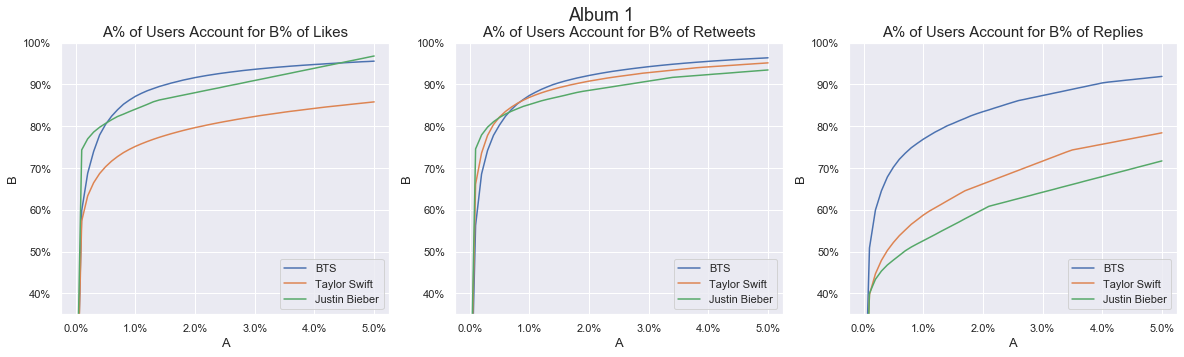

In [17]:
perc_cols = ['likes_count', 'retweets_count', 'replies_count']
df1 = bts1[~bts1.username.isin(artists)].groupby('username')[perc_cols].sum()
df2 = taylor1[~taylor1.username.isin(artists)].groupby('username')[perc_cols].sum()
df3 = justin1[~justin1.username.isin(artists)].groupby('username')[perc_cols].sum()
f = perc_plot(df1, 'Album 1', (20, 5), [df2, df3], legend=['BTS', 'Taylor Swift', 'Justin Bieber'])

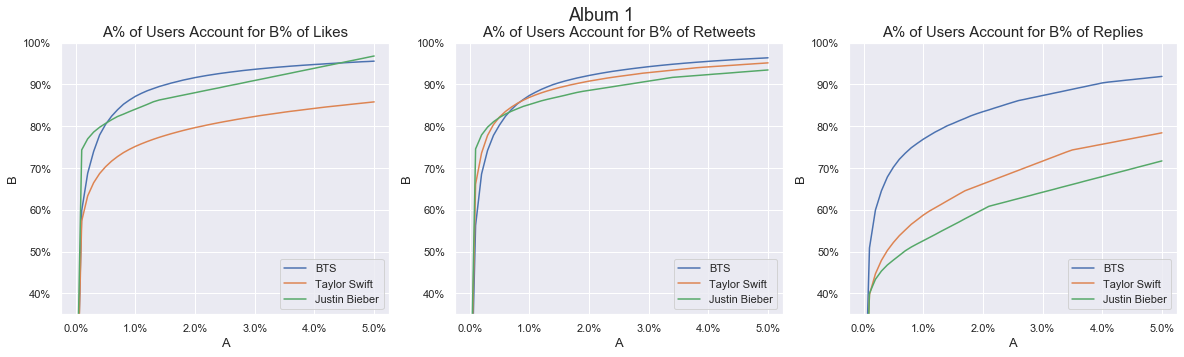

In [18]:
f.savefig

In [41]:
p11 = specific_percs(df1, [0.005, 0.01, 0.03])
print('bts1')
display(p11)
p12 = specific_percs(df2, [0.005, 0.01, 0.03])
print('taylor1')
display(p12)
p13 = specific_percs(df3, [0.005, 0.01, 0.03])
print('justin1')
display(p13)

bts1


,Likes,Retweets,Replies
0.005,80.42,80.26,70.17
0.010,87.13,87.32,76.86
0.030,93.59,94.22,87.32


taylor1


,Likes,Retweets,Replies
0.005,70.29,82.16,52.16
0.010,75.16,86.87,58.71
0.030,82.31,92.80,71.63


justin1


,Likes,Retweets,Replies
0.005,80.65,82.06,47.96
0.010,84.06,85.16,52.59
0.030,90.92,90.77,64.19


## Album 2

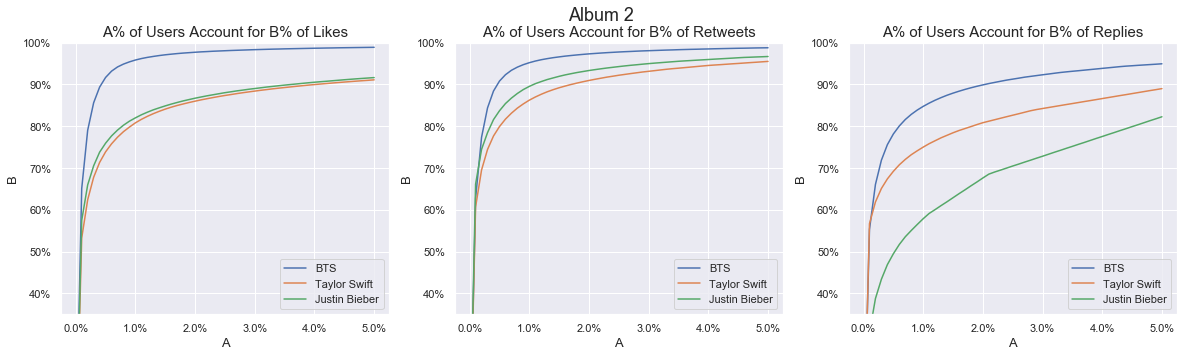

In [75]:
perc_cols = ['likes_count', 'retweets_count', 'replies_count']
df1 = bts2[~bts2.username.isin(artists)].groupby('username')[perc_cols].sum()
df2 = taylor2[~taylor2.username.isin(artists)].groupby('username')[perc_cols].sum()
df3 = justin2[~justin2.username.isin(artists)].groupby('username')[perc_cols].sum()
perc_plot(df1, 'Album 2', (20, 5), [df2, df3], legend=['BTS', 'Taylor Swift', 'Justin Bieber'])

In [44]:
p21 = specific_percs(df1, [0.005, 0.01, 0.03])
print('bts2')
display(p21)
p22 = specific_percs(df2, [0.005, 0.01, 0.03])
print('taylor2')
display(p22)
p23 = specific_percs(df3, [0.005, 0.01, 0.03])
print('justin2')
display(p23)

bts2


,Likes,Retweets,Replies
0.005,91.64,90.77,78.12
0.010,95.81,95.17,84.72
0.030,98.29,98.04,92.28


taylor2


,Likes,Retweets,Replies
0.005,73.85,79.89,69.19
0.010,80.79,86.21,74.98
0.030,88.38,93.11,84.21


justin2


,Likes,Retweets,Replies
0.005,75.92,83.67,49.47
0.010,81.98,89.50,57.86
0.030,88.99,94.95,72.80


## Album 3

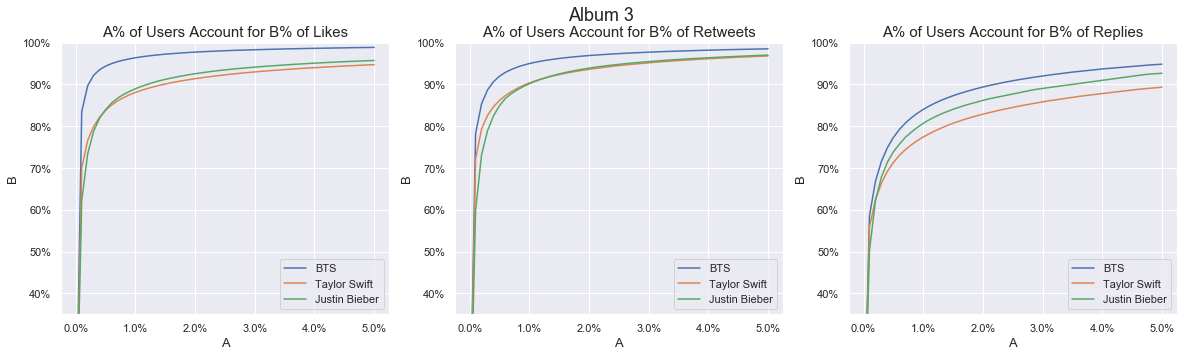

In [76]:
perc_cols = ['likes_count', 'retweets_count', 'replies_count']
df1 = bts3[~bts3.username.isin(artists)].groupby('username')[perc_cols].sum()
df2 = taylor3[~taylor3.username.isin(artists)].groupby('username')[perc_cols].sum()
df3 = justin3[~justin3.username.isin(artists)].groupby('username')[perc_cols].sum()
perc_plot(df1, 'Album 3', (20, 5), [df2, df3], legend=['BTS', 'Taylor Swift', 'Justin Bieber'])

In [45]:
p31 = specific_percs(df1, [0.005, 0.01, 0.03])
print('bts3')
display(p31)
p32 = specific_percs(df2, [0.005, 0.01, 0.03])
print('taylor3')
display(p32)
p33 = specific_percs(df3, [0.005, 0.01, 0.03])
print('justin3')
display(p33)

bts3


,Likes,Retweets,Replies
0.005,91.64,90.77,78.12
0.010,95.81,95.17,84.72
0.030,98.29,98.04,92.28


taylor3


,Likes,Retweets,Replies
0.005,73.85,79.89,69.19
0.010,80.79,86.21,74.98
0.030,88.38,93.11,84.21


justin3


,Likes,Retweets,Replies
0.005,75.92,83.67,49.47
0.010,81.98,89.50,57.86
0.030,88.99,94.95,72.80


### User/Tweet stats
a% of people made b% of tweets. table is good. do for retweets and maybe likes. idea: pick intersting or easily understandable number, and whole table in appendix

In [93]:
percent_tweets(bts3, 0.03)

38.05

In [94]:
percent_tweets(taylor3, 0.03)

33.0

In [51]:
percent_tweets(all_albums, 0.03)

20.86

In [52]:
percs = []
for i in np.arange(0.01, 0.11, 0.01):
    percs.append(percent_tweets(all_albums, i))

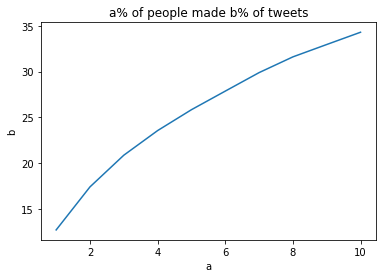

In [54]:
perc_df = pd.DataFrame().assign(a=np.arange(0.01, 0.11, 0.01)*100, b=percs)
perc_df.plot(x='a', y='b', title='a% of people made b% of tweets', ylabel='b', legend=False);

### Tweets per day

The spike on "day 12" was due to Justin Bieber's first album, which had a huge spike on day 12 (the day an additional single was released). I don't know if that's bad for our "sample" dataset... but it's what the data's giving us.

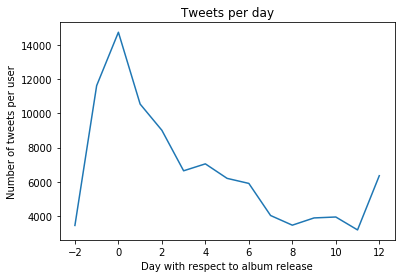

In [56]:
tweets_per_day = all_albums.normalized_dates.value_counts().sort_index()
tweets_per_day.plot(title='Tweets per day', xlabel='Day with respect to album release', ylabel='Number of tweets per user');

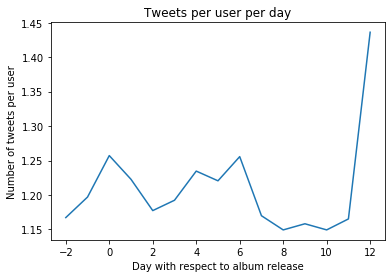

In [57]:
tweets_users_day = all_albums.groupby('normalized_dates').username.apply(lambda x: x.value_counts().mean())
tweets_users_day.plot(title='Tweets per user per day', xlabel='Day with respect to album release', ylabel='Number of tweets per user');

## Hashtags
Running count of each hastag, how commonly subsets of hashtags are used. Hashtags imply coordination. Hard to tell who coordinating, but still coordination if eg if a lot of tweets share x hashtags

Treat as a graph. Query hashtags == edges, picked out all nodes with those edges types. other hashtags are other edge types. If other tweets are connected by the other hashtags, indicates collaboration (chances of that from a "random" twitter graph is really low). If a lot of the other hashtags, more hashtags associated with campaigns.

Idea: look at n most common non-query hashtags. see if they are co-appearing. a way to measure content generators collaborating, not just "being productive" getting retweets. 

In [5]:
all_albums.num_hashtags.mean()

2.63369

In [9]:
all_albums['hashtags'] = all_albums.hashtags.apply(lambda x: eval(x))

In [3]:
bts1['hashtags_lst'] = bts1.hashtags.apply(lambda x: eval(x))
taylor1['hashtags_lst'] = taylor1.hashtags.apply(lambda x: eval(x))
justin1['hashtags_lst'] = justin1.hashtags.apply(lambda x: eval(x))

bts2['hashtags_lst'] = bts2.hashtags.apply(lambda x: eval(x))
taylor2['hashtags_lst'] = taylor2.hashtags.apply(lambda x: eval(x))
justin2['hashtags_lst'] = justin2.hashtags.apply(lambda x: eval(x))

bts3['hashtags_lst'] = bts3.hashtags.apply(lambda x: eval(x))
taylor3['hashtags_lst'] = taylor3.hashtags.apply(lambda x: eval(x))
justin3['hashtags_lst'] = justin3.hashtags.apply(lambda x: eval(x))

In [22]:
bts_hashs = [df.hashtags_lst.apply(lambda x: len(x)).mean() for df in [bts1, bts2, bts3]]
taylor_hashs = [df.hashtags_lst.apply(lambda x: len(x)).mean() for df in [taylor1, taylor2, taylor3]]
justin_hashs = [df.hashtags_lst.apply(lambda x: len(x)).mean() for df in [justin1, justin2, justin3]]
x_hashs = ['Album 1', 'Album 2', 'Album 3']

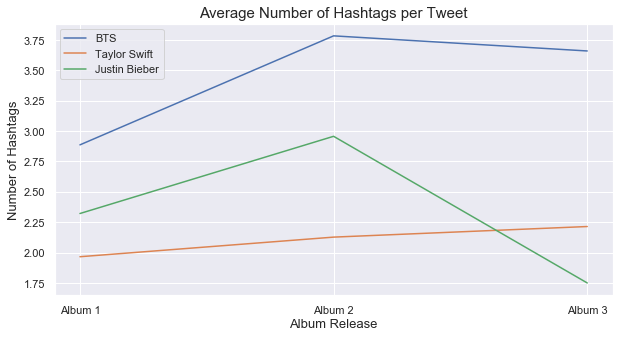

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x_hashs, bts_hashs, ax=ax)
sns.lineplot(x_hashs, taylor_hashs, ax=ax)
sns.lineplot(x_hashs, justin_hashs, ax=ax)
ax.set_title('Average Number of Hashtags per Tweet', fontsize=15)
ax.set_xlabel('Album Release', fontsize=13)
ax.set_ylabel('Number of Hashtags', fontsize=13)
ax.legend(['BTS', 'Taylor Swift', 'Justin Bieber'])

Notes: why are hashtags used (e.g. hashtags that coincide with bbmas). Types of hashtags: promotion, call to arms. Idea: pick one example for each artist (album maybe?) e.g. 'btsarmy'

Interesting to study hashtags that amplify 

In [4]:
bts1_exploded = bts1.explode('hashtags_lst')
taylor1_exploded = taylor1.explode('hashtags_lst')
justin1_exploded = justin1.explode('hashtags_lst')

bts2_exploded = bts2.explode('hashtags_lst')
taylor2_exploded = taylor2.explode('hashtags_lst')
justin2_exploded = justin2.explode('hashtags_lst')

bts3_exploded = bts3.explode('hashtags_lst')
taylor3_exploded = taylor3.explode('hashtags_lst')
justin3_exploded = justin3.explode('hashtags_lst')

In [5]:
army = bts3[bts3.hashtags.str.contains('army')]
army.head()

,date,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,normalized_dates,hashtags_lst
29,2020-12-01,1268674849158959111,jikookisrealuu,Can’t tell how happy I’m 😭😭😭💜 Jin military ser...,1,0,0,"['bts', 'btsjin', 'jin', 'kimseokjin', 'army',...",False,11,"[bts, btsjin, jin, kimseokjin, army, btsamas]"
53,2020-12-01,1033336057398472705,moonchild1992,We cute. #ARSD #ARMYSelcaDay #BTS #NAMJOON #...,1,0,13,"['arsd', 'armyselcaday', 'bts', 'namjoon', 'rm...",False,11,"[arsd, armyselcaday, bts, namjoon, rm, btsarmy]"
59,2020-12-01,919682239088267264,bts_unitedlatam,&gt;011220&lt; [INFO] BTS extendió su récord e...,0,0,0,"['bts', 'btsarmy', 'bts_be']",False,11,"[bts, btsarmy, bts_be]"
71,2020-12-01,3764591832,mizuki_shizen,Hey na na na @BTS_twt #BETODAY #ARMY #BTSARMY ...,0,1,1,"['betoday', 'army', 'btsarmy', 'bts', 'be', 'l...",False,11,"[betoday, army, btsarmy, bts, be, lifegoeson]"
72,2020-12-01,1108385386668023809,baby9486a,https://t.co/hE4byVOWyw 인터파크 투표부탁드려요 #AlwaysW...,0,5,2,"['alwayswithbts', 'bts', 'btsarmy']",False,11,"[alwayswithbts, bts, btsarmy]"


In [34]:
tot_bts3_likes = bts3[~bts3.username.isin(artists)].retweets_count.sum()

In [48]:
army.replies_count.mean()

0.728415027932042

In [61]:
df_bar

,Hashtag,y,x
0,#army,30.504005,Likes
1,#army,6.808960,Likes
2,#army,0.728415,Likes
3,#proudoftaylor,9.284314,Retweets
4,#proudoftaylor,1.506209,Retweets
5,#proudoftaylor,1.983660,Retweets
6,#bieber2020,3.011111,Replies
7,#bieber2020,1.118519,Replies
8,#bieber2020,0.083333,Replies


Text(0, 0.5, 'Average Number per Tweet')

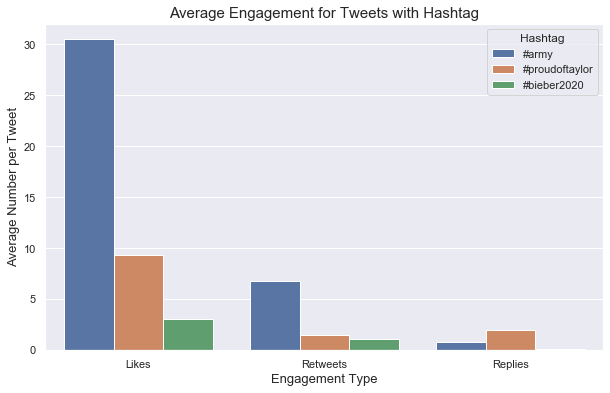

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
army_y = [army[col].mean() for col in ['likes_count', 'retweets_count', 'replies_count']]
proud_y = [proud[col].mean() for col in ['likes_count', 'retweets_count', 'replies_count']]
bieb_y = [bieb2020[col].mean() for col in ['likes_count', 'retweets_count', 'replies_count']]
df_bar = pd.DataFrame({'Hashtag': ['#army'] * 3 + ['#proudoftaylor'] * 3 +  ['#bieber2020'] * 3,
                       'y': army_y + proud_y + bieb_y, 
                       'x': ['Likes', 'Retweets', 'Replies'] * 3})
sns.barplot('x', 'y', data=df_bar, hue='Hashtag', ax=ax)
ax.set_title('Average Engagement for Tweets with Hashtag', fontsize=15)
ax.set_xlabel('Engagement Type', fontsize=13)
ax.set_ylabel('Average Number per Tweet', fontsize=13)

In [30]:
(army.hashtags_lst.apply(lambda x: len(x)) <= 2).mean()

0.0679469537901506

In [13]:
len(army)

182407

In [47]:
proud.replies_count.mean()

1.9836601307189543

In [7]:
proud = taylor3[taylor3.hashtags.str.contains('proudoftaylor')]
proud.head()

,date,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,normalized_dates,hashtags_lst
51,2020-08-05,1158519584544219137,elisetheswiftie,JUST A REMINDER THAT YOU ARE VALIDATED AND BEA...,0,0,2,"['folklore', 'cardigan', 'proudoftaylor', 'the...",False,12,"[folklore, cardigan, proudoftaylor, thelakes, ..."
62,2020-08-05,1148836063437361152,taylor1folklore,@amazonmusic #TaylorSwift #ProudOfTaylor,0,0,1,"['taylorswift', 'proudoftaylor']",False,12,"[taylorswift, proudoftaylor]"
67,2020-08-05,1158519584544219137,elisetheswiftie,I will never shut up about the bridge in augus...,0,1,3,"['folklore', 'august', 'cardigan', 'taylorswif...",False,12,"[folklore, august, cardigan, taylorswift, prou..."
128,2020-08-05,1158519584544219137,elisetheswiftie,YOU GUYS IM IN THE CAR AND JUST HEARD CARDIGAN...,1,0,2,"['folklore', 'cardiganbuyingparty', 'cardigan'...",False,12,"[folklore, cardiganbuyingparty, cardigan, tayl..."
207,2020-08-05,1148836063437361152,taylor1folklore,#folklore #TaylorSwift #cardigan #ProudOfTaylo...,1,0,1,"['folklore', 'taylorswift', 'cardigan', 'proud...",False,12,"[folklore, taylorswift, cardigan, proudoftaylo..."


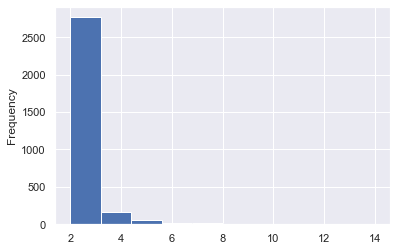

In [26]:
proud.hashtags_lst.apply(lambda x: len(x)).plot.hist()

In [8]:
proud.hashtags_lst.apply(lambda x: len(x)).mean()

2.5022875816993464

In [12]:
len(proud)

3060

In [9]:
bieb2020 = justin3[justin3.hashtags.str.contains('bieber2020')]
bieb2020.head()

,date,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,normalized_dates,hashtags_lst
4,2020-02-26,3420957633,bionabieber,@justinbieber #justinbieber #Beliebers #Bieber...,0,0,0,"['justinbieber', 'beliebers', 'bieber', 'chang...",False,12,"[justinbieber, beliebers, bieber, changes, bie..."
68,2020-02-26,815976024340996096,lifeofvasti,Justin Bieber Seasons is the real vibe. Congra...,0,0,2,"['changestour', 'justinbieber', 'changes', 'bi...",False,12,"[changestour, justinbieber, changes, bieber202..."
189,2020-02-25,1210475772101529600,justinupdatezz,I wrote this for you @justinbieber . I love yo...,2,8,10,"['jb5', 'lovejustin', 'justinbieber', 'justinb...",False,11,"[jb5, lovejustin, justinbieber, justinbieberse..."
198,2020-02-25,726111150690045952,lgirlsshop,CHANGES - THE ALBUM #justinbieber @justinbiebe...,0,0,0,"['justinbieber', 'beliebers', 'bieber2020', 'y...",False,11,"[justinbieber, beliebers, bieber2020, yummy, y..."
218,2020-02-25,325433545,hmv_tachikawa,【#JustinBieber】 新しいジャスティンがそこにいる―。 世界が待っていた #ジャ...,0,0,1,"['justinbieber', 'ジャスティン・ビーバー', 'bieber2020']",False,11,"[justinbieber, ジャスティン・ビーバー, bieber2020]"


In [10]:
bieb2020.hashtags_lst.apply(lambda x: len(x)).mean()

4.674074074074074

In [11]:
len(bieb2020)

540

In [46]:
bieb2020.replies_count.mean()

0.08333333333333333